# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='viridis')
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='viridis')
%matplotlib inline

# Load dataset

In [3]:
df=pd.read_csv('anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df.shape

(12294, 7)

In [5]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

# EDA

In [6]:
for i in df.isna().sum():
    print(round(i/len(df)*100,2),'%')

0.0 %
0.0 %
0.5 %
0.2 %
0.0 %
1.87 %
0.0 %


In [7]:
df.dropna(inplace=True)


In [8]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [9]:
df ['genre'].nunique()

3229

In [10]:
df ['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

In [11]:
df ['name'].nunique()

12015

In [12]:
df ['episodes'].nunique()

187

In [13]:
df ['members'].nunique()

6596

In [14]:
df ['rating'].nunique()

598

# Visualizations

In [15]:
top_genres = df['genre'].value_counts().head(10).index
df_top = df[df['genre'].isin(top_genres)]


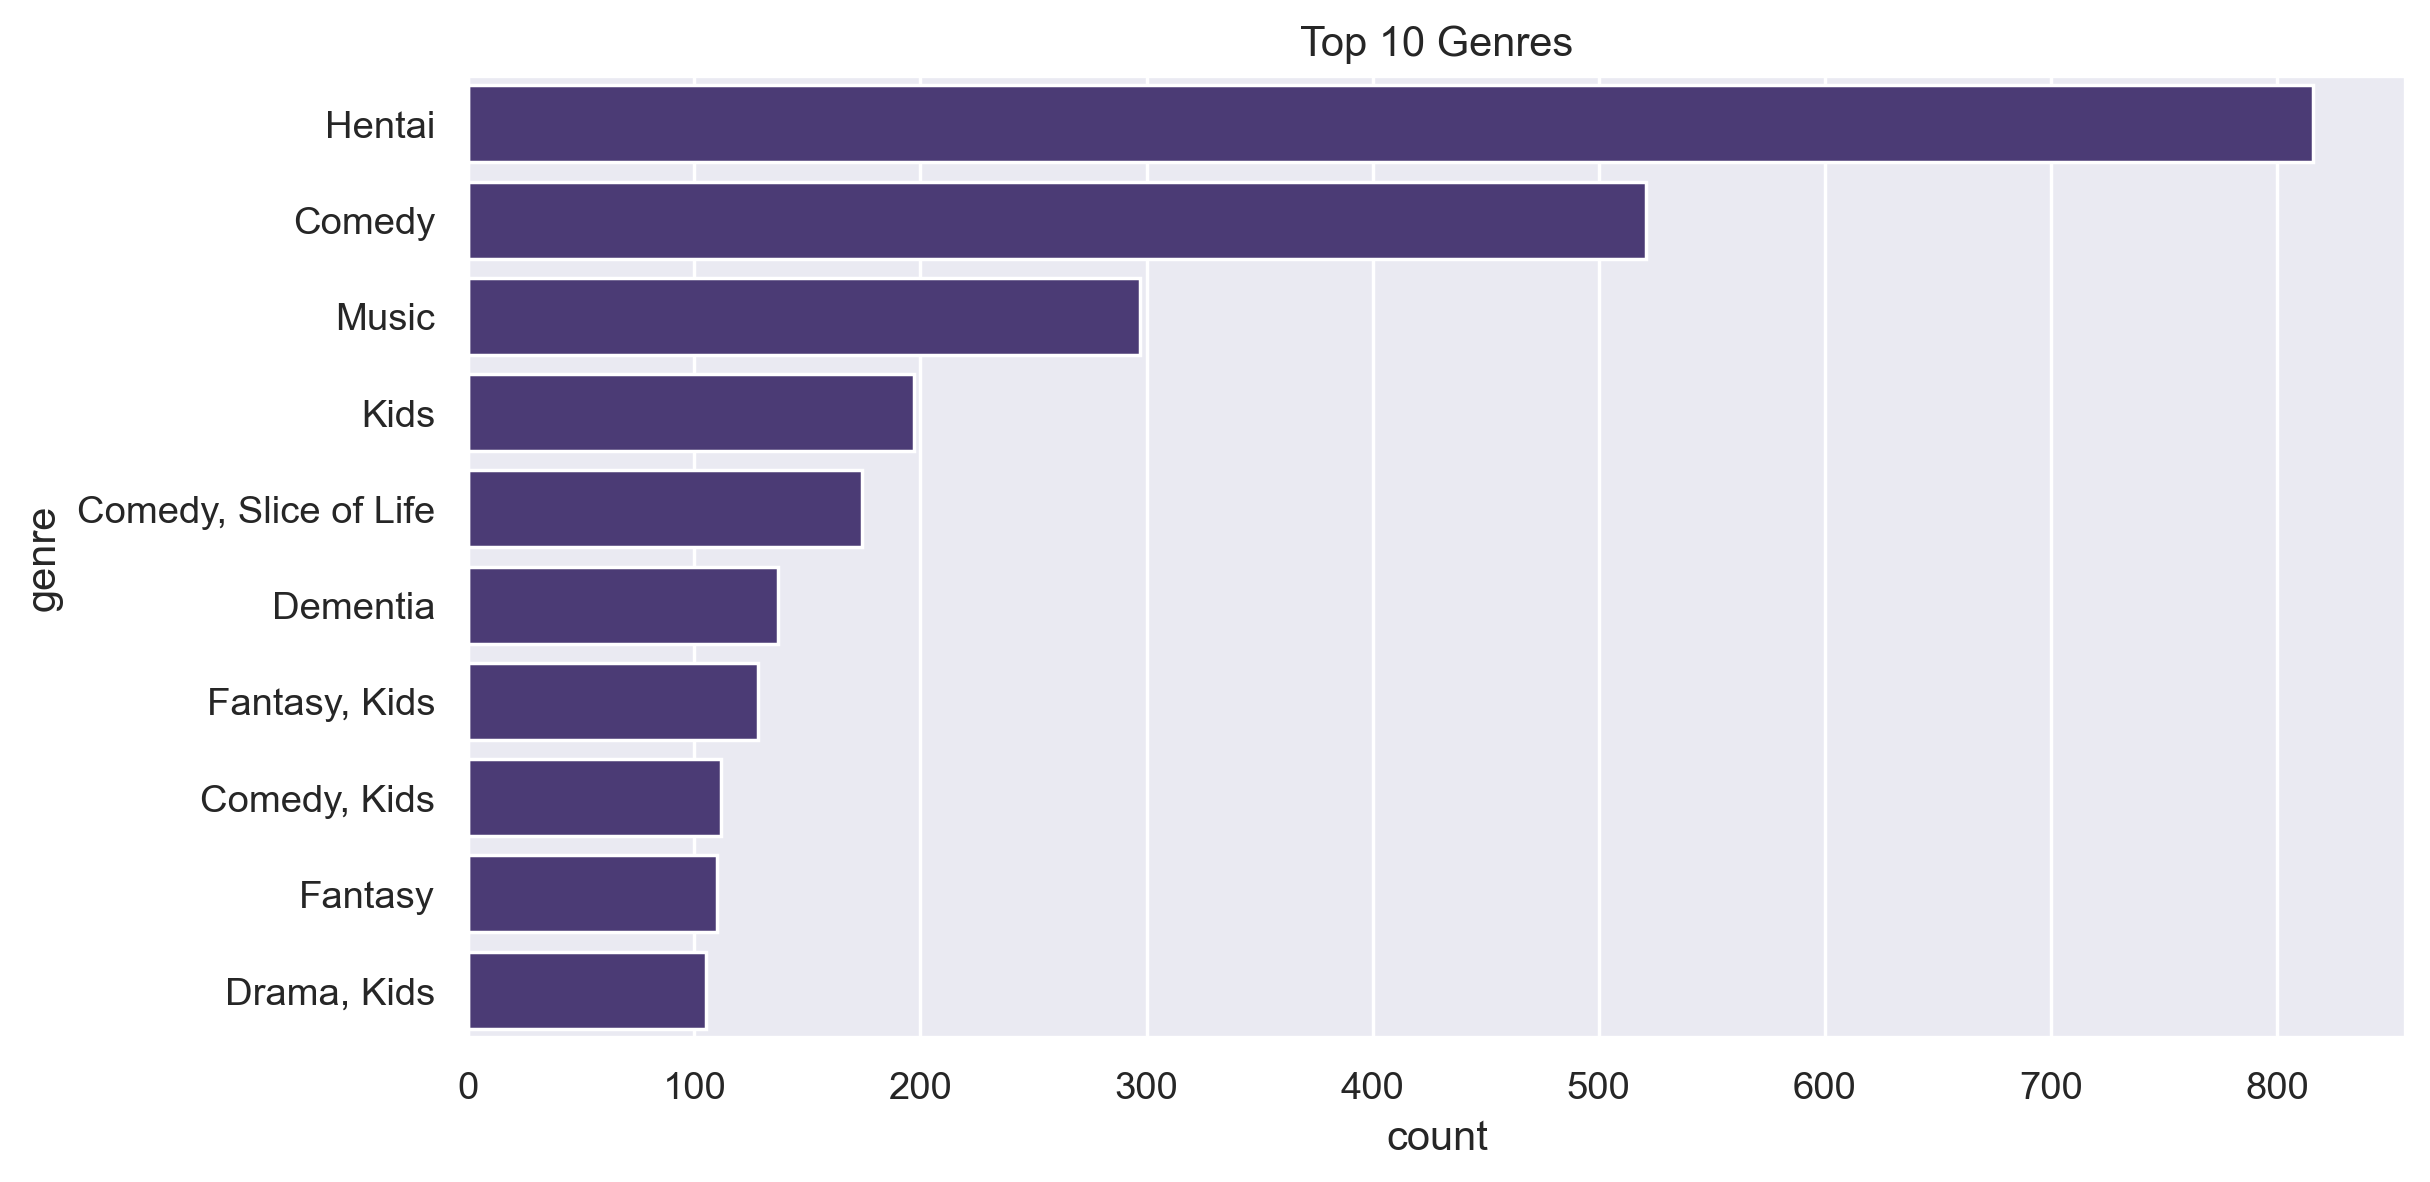

In [16]:
#countplot

sns.countplot(data=df_top, y='genre', order=top_genres)
plt.title("Top 10 Genres")
plt.show()


In [17]:
df['genre'].value_counts()

genre
Hentai                                 816
Comedy                                 521
Music                                  297
Kids                                   197
Comedy, Slice of Life                  174
                                      ... 
Action, Hentai, Mecha, Sci-Fi, Yaoi      1
Adventure, Fantasy, Hentai               1
Hentai, Horror, Yaoi                     1
Hentai, Space                            1
Drama, Hentai, Mystery, Romance          1
Name: count, Length: 3229, dtype: int64

In [18]:
top_rating = df['rating'].value_counts().head(10).index
df_top = df[df['rating'].isin(top_rating)]


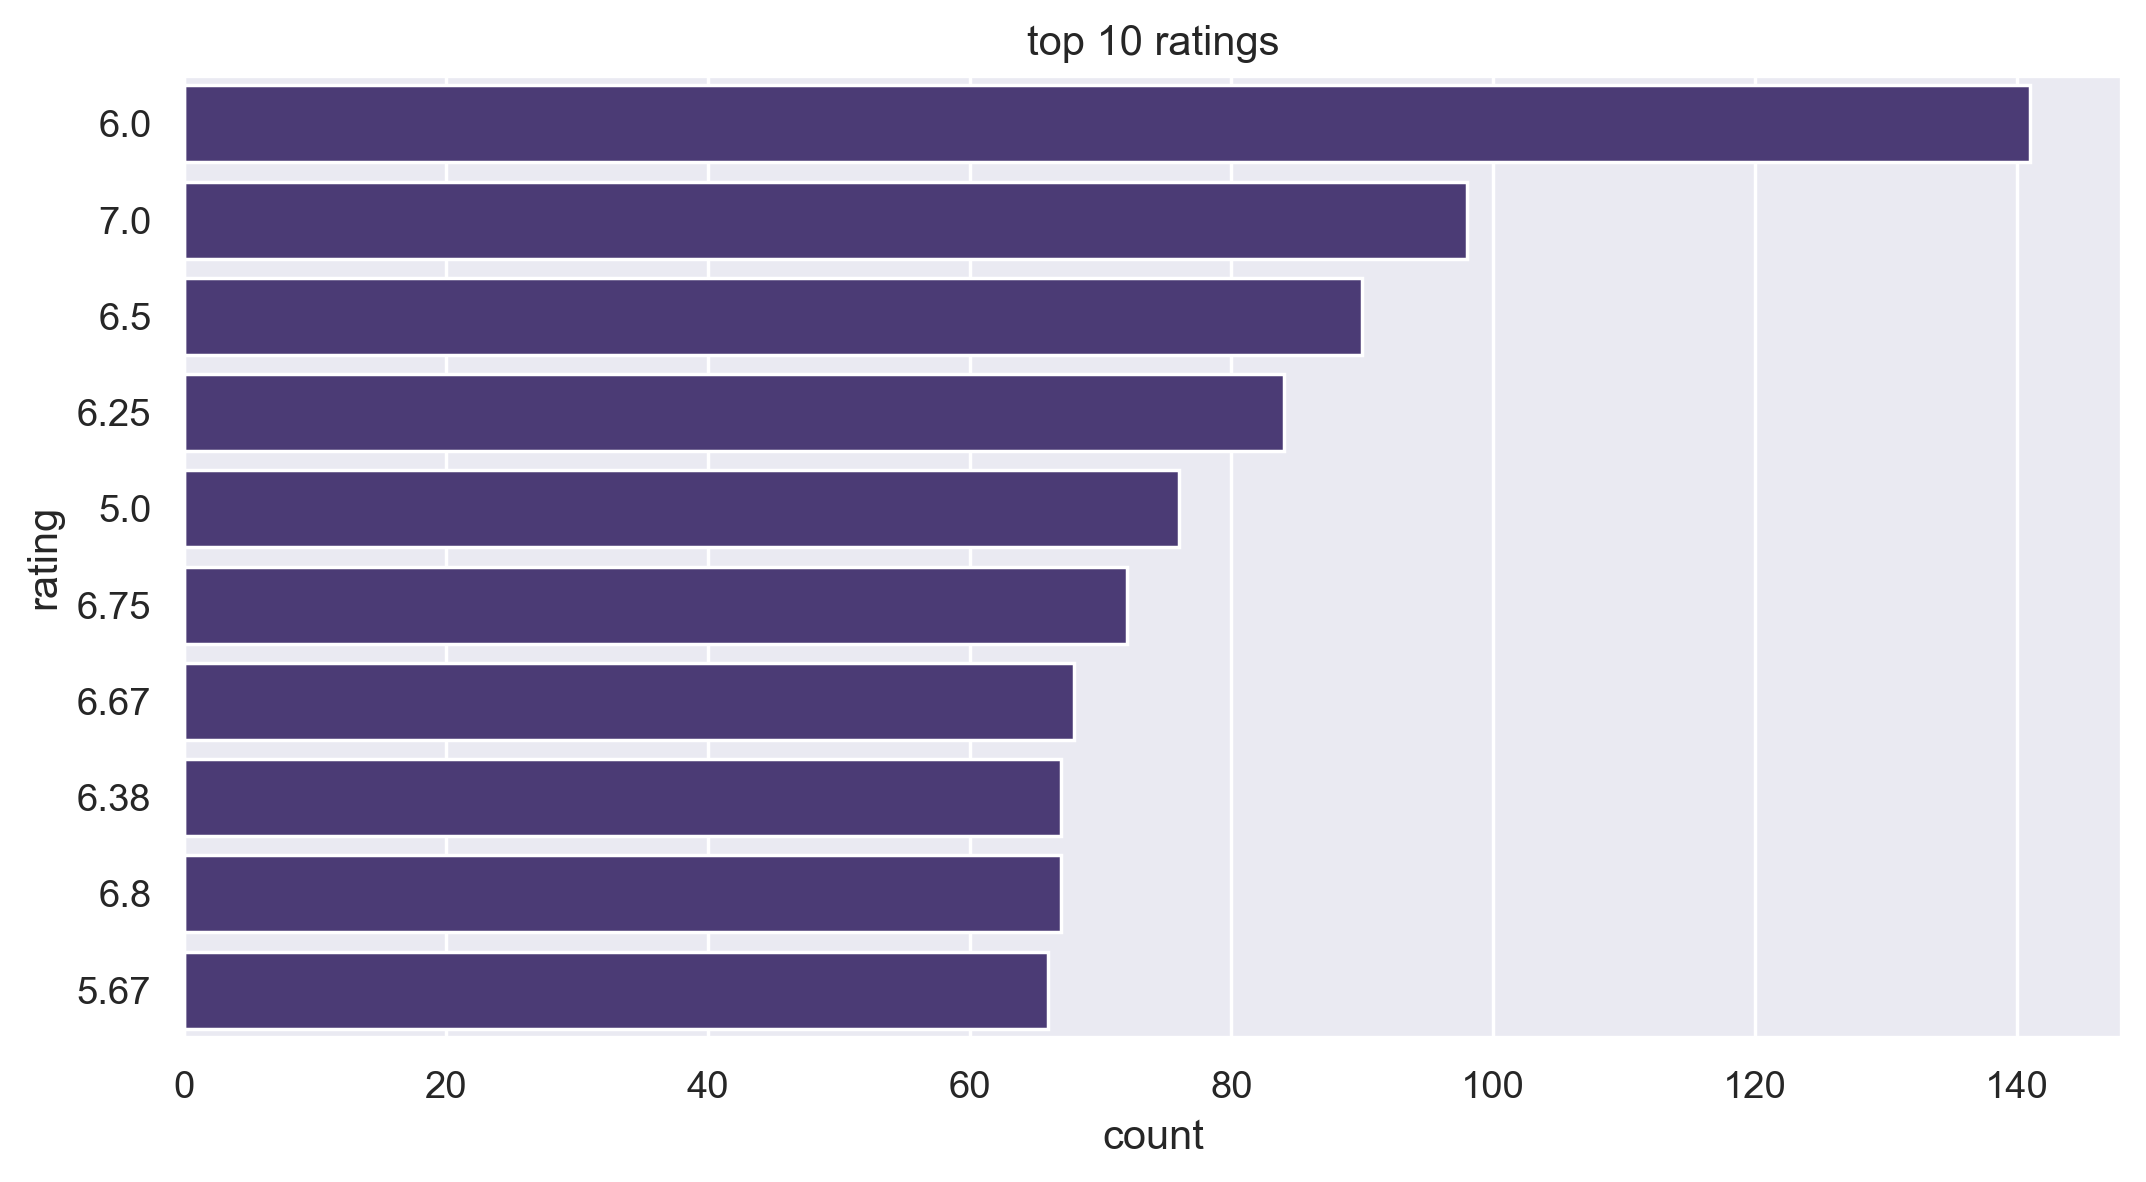

In [19]:
sns.countplot(data=df_top , y='rating',order=top_rating)
plt.title('top 10 ratings')
plt.show()

# Model Building 

# CONTENT-BASED RECOMMENDATION

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
#use TF-IDF Vectorizer on 'genre' column
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['genre'])

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [35]:
cosine_sim

array([[1.        , 0.14715318, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14715318, 1.        , 0.17877808, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.17877808, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]], shape=(12017, 12017))

In [36]:
np.fill_diagonal(cosine_sim,0)

In [37]:
similarity=pd.DataFrame(cosine_sim)
similarity

,0,1,2,3,4,5,6,7,8,9,...,12007,12008,12009,12010,12011,12012,12013,12014,12015,12016
0,0.000000,0.147153,0.000000,0.000000,0.000000,0.426050,0.000000,0.156140,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.147153,0.000000,0.178778,0.000000,0.178778,0.282882,0.339213,0.407534,0.178778,0.178778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.178778,0.000000,0.220855,1.000000,0.182588,0.195860,0.199140,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.220855,0.000000,0.220855,0.000000,0.000000,0.274732,0.220855,0.220855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.178778,1.000000,0.220855,0.000000,0.182588,0.195860,0.199140,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
12013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
12014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
12015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [38]:
df['genre'].unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Action, Comedy, Hentai, Romance, Supernatural',
       'Hentai, Sports', 'Hentai, Slice of Life'],
      shape=(3229,), dtype=object)

In [39]:
#Create mapping from anime name to index
indices = pd.Series(df.index, index=df['name']).drop_duplicates()

In [40]:
#Recommendation function
def recommend(anime_name, top_n=5):
    if anime_name not in indices:
        return f"Anime '{anime_name}' not found in dataset."

    idx = indices[anime_name]
    sim_scores = list(enumerate(cosine_sim[idx]))  # All similarity scores with that anime
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  # Sort descending
    sim_scores = sim_scores[1:top_n+1]  # Exclude the anime itself (at position 0)

    anime_indices = [i[0] for i in sim_scores]
    return df[['name', 'genre']].iloc[anime_indices]
#return df[['name', 'genre', 'type', 'rating']].iloc[anime_indices]


In [41]:
print(" Recommended anime for 'Naruto':")
print(recommend("Naruto", top_n=5))

 Recommended anime for 'Naruto':
                                                   name  \
615                                  Naruto: Shippuuden   
1103  Boruto: Naruto the Movie - Naruto ga Hokage ni...   
1343                                        Naruto x UT   
1472        Naruto: Shippuuden Movie 4 - The Lost Tower   
1573  Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...   

                                                  genre  
615   Action, Comedy, Martial Arts, Shounen, Super P...  
1103  Action, Comedy, Martial Arts, Shounen, Super P...  
1343  Action, Comedy, Martial Arts, Shounen, Super P...  
1472  Action, Comedy, Martial Arts, Shounen, Super P...  
1573  Action, Comedy, Martial Arts, Shounen, Super P...  


This recommendation system is based on genre similarity.

The anime recommended here are all very closely related to Naruto, because:

Most are Naruto sequels, movies, or spin-offs

They have almost exactly the same genres:

Action

Comedy

Martial Arts

Shounen

Super Power